In [1]:
#irish flower

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score

In [3]:
col=["sepal_length","sepal_width","petal_length","pital_width","flower_type"]

In [4]:
dataset=pd.read_csv("iris.data",names=col)

In [5]:
dataset.head()

,sepal_length,sepal_width,petal_length,pital_width,flower_type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#missing data
dataset.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
pital_width     0
flower_type     0
dtype: int64

In [7]:
dataset.describe()

,sepal_length,sepal_width,petal_length,pital_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
#correlation matrix
corr_matrix=dataset.corr()
print(corr_matrix)

              sepal_length  sepal_width  petal_length  pital_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
pital_width       0.817954    -0.356544      0.962757     1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020191616E88>,
      dtype=object)

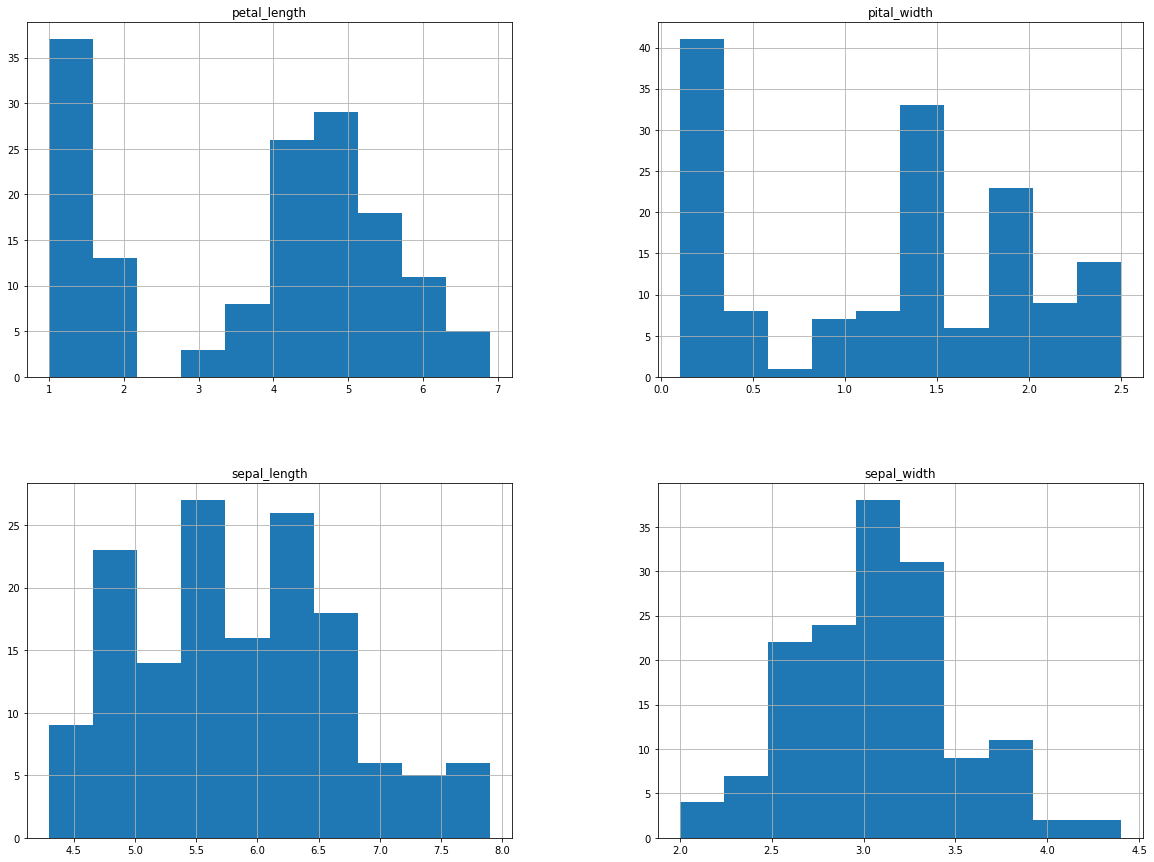

In [9]:
dataset.hist(figsize=(20,15))

In [10]:
dataset["flower_type"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: flower_type, dtype: int64

In [11]:
x=dataset.copy()

In [12]:
x.drop(["flower_type"],inplace=True,axis=1)

In [13]:
x.head()

,sepal_length,sepal_width,petal_length,pital_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
min_max=MinMaxScaler()
x=min_max.fit_transform(x)

In [15]:
x

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [16]:
y=dataset["flower_type"].values

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y.shape=(-1,1)
y=le.fit_transform(y)

C:\Users\akprp\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:251: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Text(0, 0.5, 'sepal_width')

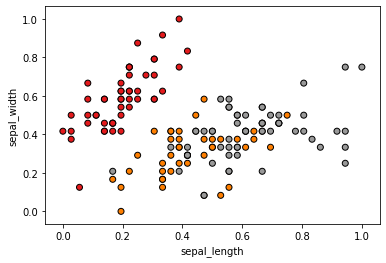

In [19]:
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.Set1,edgecolors="k")
plt.xlabel("sepal_length")
plt.ylabel("sepal_width")

Text(0, 0.5, 'petal_width')

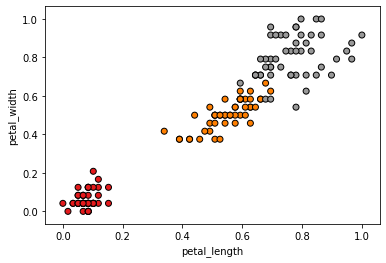

In [20]:
plt.scatter(x[:,2],x[:,3],c=y,cmap=plt.cm.Set1,edgecolors="k")
plt.xlabel("petal_length")
plt.ylabel("petal_width")

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


In [23]:
accurracy={}

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifier

In [25]:
lr=LogisticRegression()
sgdc=SGDClassifier()
rfc=RandomForestClassifier(n_estimators=200)
dtc=DecisionTreeClassifier()
naive_bayes_classifier=GaussianNB()
knn=KNeighborsClassifier(n_neighbors=10)
svc=SVC(kernel="rbf")
xgboost=XGBClassifier(n_estimators=200)
rc=RidgeClassifier()

In [30]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score,f1_score,average_precision_score
def classifier(algorithm):
    algorithm.fit(x_train,y_train)
    y_pred=algorithm.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    cm=confusion_matrix(y_test,y_pred)
    recall=recall_score(y_test,y_pred,average=None)
    precision=precision_score(y_test,y_pred,average=None)
    f1=f1_score(y_test,y_pred,average=None)
    return acc,cm,recall,precision,f1

In [31]:
accurracy["logistic_reg"]=classifier(lr)
accurracy["random_forest"]=classifier(rfc)
accurracy["sgdc"]=classifier(sgdc)
accurracy["decision_tree"]=classifier(dtc)
accurracy["naive_bayes"]=classifier(naive_bayes_classifier)
accurracy["knn"]=classifier(knn)
accurracy["svc"]=classifier(svc)
accurracy["xgboost"]=classifier(xgboost)
accurracy["rc"]=classifier(rc)

In [32]:
accurracy

{'logistic_reg': (0.9666666666666667,
  array([[14,  0,  0],
         [ 0,  5,  0],
         [ 0,  1, 10]], dtype=int64),
  array([1.        , 1.        , 0.90909091]),
  array([1.        , 0.83333333, 1.        ]),
  array([1.        , 0.90909091, 0.95238095])),
 'random_forest': (0.9666666666666667,
  array([[14,  0,  0],
         [ 0,  5,  0],
         [ 0,  1, 10]], dtype=int64),
  array([1.        , 1.        , 0.90909091]),
  array([1.        , 0.83333333, 1.        ]),
  array([1.        , 0.90909091, 0.95238095])),
 'sgdc': (0.8666666666666667,
  array([[14,  0,  0],
         [ 0,  5,  0],
         [ 0,  4,  7]], dtype=int64),
  array([1.        , 1.        , 0.63636364]),
  array([1.        , 0.55555556, 1.        ]),
  array([1.        , 0.71428571, 0.77777778])),
 'decision_tree': (0.9666666666666667,
  array([[14,  0,  0],
         [ 0,  5,  0],
         [ 0,  1, 10]], dtype=int64),
  array([1.        , 1.        , 0.90909091]),
  array([1.        , 0.83333333, 1.        ])